في هذا النشاط سنرى كيف يمكن تحويل النص إلى أرقام. ويسمى هذا النوع من التمثيل الرقمي *متجها vector*. ومن ثم تسمى كل عملية تحول فيها اللغة إلى أرقام بالتمثيل المتجهي vectorizing. وكالعادة سنبدأ الآن بتحميل بيئة العمل.


In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Done!


سنبدأ هذه المرة بالعمل على المدونات الرقمية (مدونة من التغريدات تمثل مدنا متنوعة حول العالم). وكل صف فيها عبارة عن عينة تجمع عددا من التغريدات المنشورة في وقت محدد.



In [2]:
file = "sociolinguistics.english_cities.gz"
file = os.path.join(ai.data_dir, file)
df = pd.read_csv(file, nrows = 10000)
print(df)
print("\nDone!")


             City                                               Text
0      washington   you really need to go back to bar tending or ...
1          london   jay finley christ in explains why today is co...
2           lagos   forget if this happened truly it s definitely...
3         toronto   yall i love this skin big thanks to for makin...
4         nairobi   the late brilliant prof ali mazrui explains h...
...           ...                                                ...
9995       dallas   seriously god is peripheral god is nice or ma...
9996  los_angeles   good morning watching workouts who shall be m...
9997       mumbai   you need to provide everything online on site...
9998      toronto   we re hiring the centre is looking for highly...
9999      kolkata   ingersoll rand is hiring for engineer i banga...

[10000 rows x 2 columns]

Done!


إذن سنشغل هذا الكود لتحويل هذه المدونة إلى متجه تكراري من الكلمات. وقد سنستعمل مكتبة *scikit-learn* لإجراء هذا التحليل.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input = "content", analyzer = "word")

print("Done!")

Done!


والآن لنتابع، ونستعمله.

In [4]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line])
print(vector)
print("Done!")

  (0, 427)	36
  (0, 172)	4
  (0, 168)	5
  (0, 256)	1
  (0, 89)	1
  (0, 389)	3
  (0, 161)	1
  (0, 463)	1
  (0, 379)	1
  (0, 300)	6
  (0, 54)	1
  (0, 354)	1
  (0, 358)	1
  (0, 227)	8
  (0, 513)	2
  (0, 403)	1
  (0, 122)	1
  (0, 151)	12
  (0, 104)	1
  (0, 517)	2
  (0, 505)	2
  (0, 392)	2
  (0, 220)	2
  (0, 130)	2
  (0, 375)	1
  :	:
  (0, 423)	1
  (0, 100)	1
  (0, 118)	1
  (0, 445)	1
  (0, 75)	1
  (0, 332)	1
  (0, 77)	1
  (0, 510)	1
  (0, 357)	1
  (0, 7)	1
  (0, 322)	1
  (0, 377)	2
  (0, 273)	1
  (0, 299)	1
  (0, 234)	1
  (0, 368)	1
  (0, 270)	1
  (0, 47)	1
  (0, 254)	1
  (0, 252)	1
  (0, 456)	1
  (0, 452)	1
  (0, 221)	1
  (0, 378)	1
  (0, 193)	1
Done!


إذن أول ما استعرضناه هو السلسلة الحرفية. وما يأتي بعدها هو النقل المتجهي أو الرقمي لتلك السلسلة الحرفية.


وما يظهر حاليا هو المتجه في صيغة متجه *متناثر sparse* لا ينبغي فيه عرض كل عنصر من العناصر. والتمثيل المتجهي المتناثر مفيد؛ لأن الكثير من القيم ستكون قيما صفرية. وسنعرض لاحقا النسخة الكاملة بتحويل هذا المتجه إلى متجه كثيف dense.

In [5]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line]).todense()
print(vector)
print("Done!")

[[ 1  3  1  1  2  1  2  2  1  1  5  2  3  2  1  1  3  6 16  1  1  1  1  1
   1  1  1  1  1  1  1  6  4  1  1  1  4  1  1  1  2  1  1  1  1  3  1  1
   3  2  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   3  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4  2
   1  1  1  2  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
   1  2  1 14  1  1  4  1  1  1  3  1  1  1  1  1  1  1  2  1  1  1  3  3
   1  1  1  1  1  1  1  1  1  3  1  5  7  1  1  7  1  1  1  2  1  1  1  3
   1  2  1  3  2  4  1  1  1  1  5  1  1  6  1  1  1 12  1  1  1  2 16  2
  11  1  1  1  1  1  1  2  2  1  1  1  2  1  4  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  2  2  1  1  1  2  1  2  1
   1  1  1  5  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  1  1  1  8
   1  1  1  1  2  1  1  2  1  1  1  1  3  1  1 10  1  2  1  1  1 14  1  1
   6  3  3  1  5  2  1  1  1  3  2  1 

لننته الآن من ذلك بعرضه في إطار بيانات مناسب.

In [6]:
line = ai.print_sample(df)
vector = vectorizer.fit_transform([line])
vector = ai.print_vector(vector, vectorizer)
print(vector)
print("Done!")

            0
abbott      1
about       1
absolutely  1
academics   1
act         1
...        ..
you         9
your        4
zero        1
𝓲𝓷          1
𝓲𝓽𝓪𝓵𝓲𝓬𝓼     1

[563 rows x 1 columns]
Done!


تحول هذه العملية كل جملة إلى قائمة من الأرقام. وفي كل مرة تمثل عينة واحدة فقط. وهذا يعني أن هذا المتجه ليس مفيدا في إجراء عمليات المقارنة. كما أننا لم نقرر كيفية تمثيل الخاصية اللغوية تمثيلا أدق. فهذه مجرد نظرة أولى لكيفية تحويل نصوصنا إلى متجهات.


لنغير الآن هدفنا ونلقي نظرة على تكرارات الكلمات. فما الذي سيحدث لو حسبنا عدد كل الكلمات؟ سنحمّل هنا التكرارات المحسوبة سابقا لمدونة *نيويورك تايمز NYT* كاملة.


In [7]:
file = "economic.nyt.1931-2016.gz.freq.gz"
file = os.path.join(ai.data_dir, file)
freq_df = pd.read_csv(file, index_col = 0)
print(freq_df)

print(freq_df.loc[:,"Freq"].sum())

                     Freq
the              23600413
of               13228324
a                 9252017
and               8944509
to                8118755
...                   ...
morespecific            1
carolinareturns         1
sumbono                 1
rhombuses               1
fathersons              1

[1452616 rows x 1 columns]
364554840


In [10]:
file = "economic.congress.1931-2016.gz.freq.gz"
file = os.path.join(ai.data_dir, file)
freq_df2 = pd.read_csv(file, index_col = 0)
freq_df2.columns = ["Freq"]
print(freq_df2)

print(freq_df2.loc[:,"Freq"].sum())
freq_df2.reset_index(level=0, inplace=True)

                  Freq
the           62430126
of            31703209
to            27865993
and           21293643
in            18100620
...                ...
frfrench             1
iajapanese           1
ukunited             1
pnpanamantan         1
desron               1

[1836019 rows x 1 columns]
842553927


إذن لدينا هنا ما مجموعه 1,452,132 كلمة نوعية، و364,554,943 كلمة فعلية. وهي بيانات رقمية غير رسمية. لكن ماذا عن نصوص خطابات الكونقرس؟ لقد حملنا أيضا تكرارات الكلمات الخاصة بنصوص الكونقرس. وفيها يوجد بيانات أكثر (842 مليون كلمة)، ولكنها فقط 1,832,931 كلمة نوعية. حيث إن نسبة الكلمات النوعية للفعلية في مدونة نيويورك تايمز هي 0.0039، فيما هي في مدونة خطابات الكونقرس 0.0021. ومن ثم فإن بيانات مدونة الخطابات هي أكثر صِيغِيَّة وبمفردات جديدة أقل.

ولكن كيف يبدو توزيع تكرارات الكلمات؟ دعونا نرسم تمثيلا بيانيا يوضح عدد الكلمات عند كل نقطة تكرار. وحيث إن التكرار ينخفض انخفاضا حادا سريعا، لا بد من استعمال مقياس لوغاريثمي.

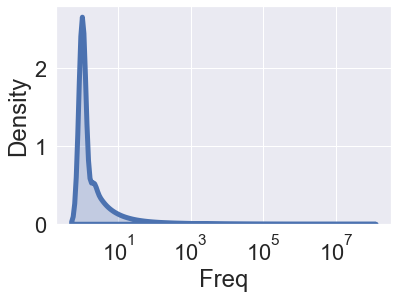

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

sns.set(font_scale = 2)
sns.kdeplot(data = freq_df2, x = "Freq", fill = True, log_scale = True, linewidth = 5, 
            bw_method = "scott", bw_adjust = 3)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27



وهذا يبين أن معظم الكلمات ذات تكرار منخفض، مع عدد قليل منها يرد بتكرار عال (الطرف الطويل في الشكل المتجه نحو اليمين).